In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# Data pre-processing

In [7]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(inplace=True)

# Data Exploration and Visualization

In [10]:
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

### family_history_with_overweight	= Has a family member suffered or suffers from overweight?
### FAVC	                                           =Do you eat high caloric food frequently?
### FCVC		                                       =Do you usually eat vegetables in your meals?
### NCP	                                                =How many main meals do you have daily? 
### CAEC		                                      =Do you eat any food between meals?
### SMOKE			                                =Do you smoke?
### CH2O			                                  =How much water do you drink daily?
### SCC			                                       =Do you monitor the calories you eat daily?
### FAF			                                        =How often do you have physical activity?
### TUE			                                        =How much time do you use technological devices such as cell phone,                                                                               videogames, television, computer and others?
### CALC		                                      =How often do you drink alcohol?
### MTRANS		                                  =Which transportation do you usually use?
### NObeyesdad			                        =Obesity level


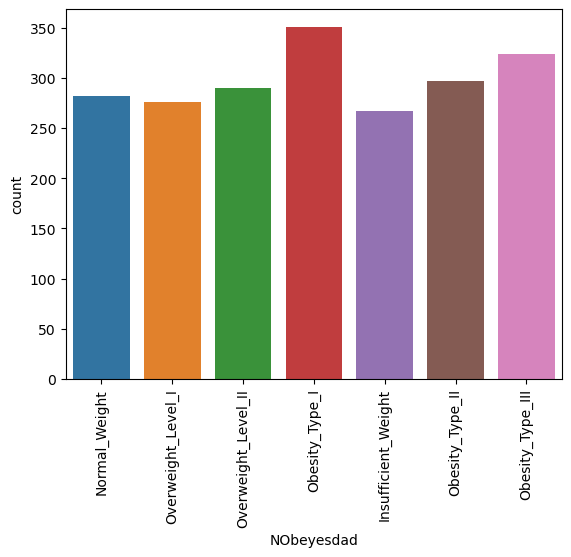

In [11]:
sns.countplot(x='NObeyesdad', data=df)
plt.xticks(rotation=90) 
plt.show()

In [12]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [13]:
category_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

df['NObeyesdad_numeric'] = df['NObeyesdad'].map(category_mapping)
df = df.rename(columns={'NObeyesdad_numeric': 'Obesity level'})

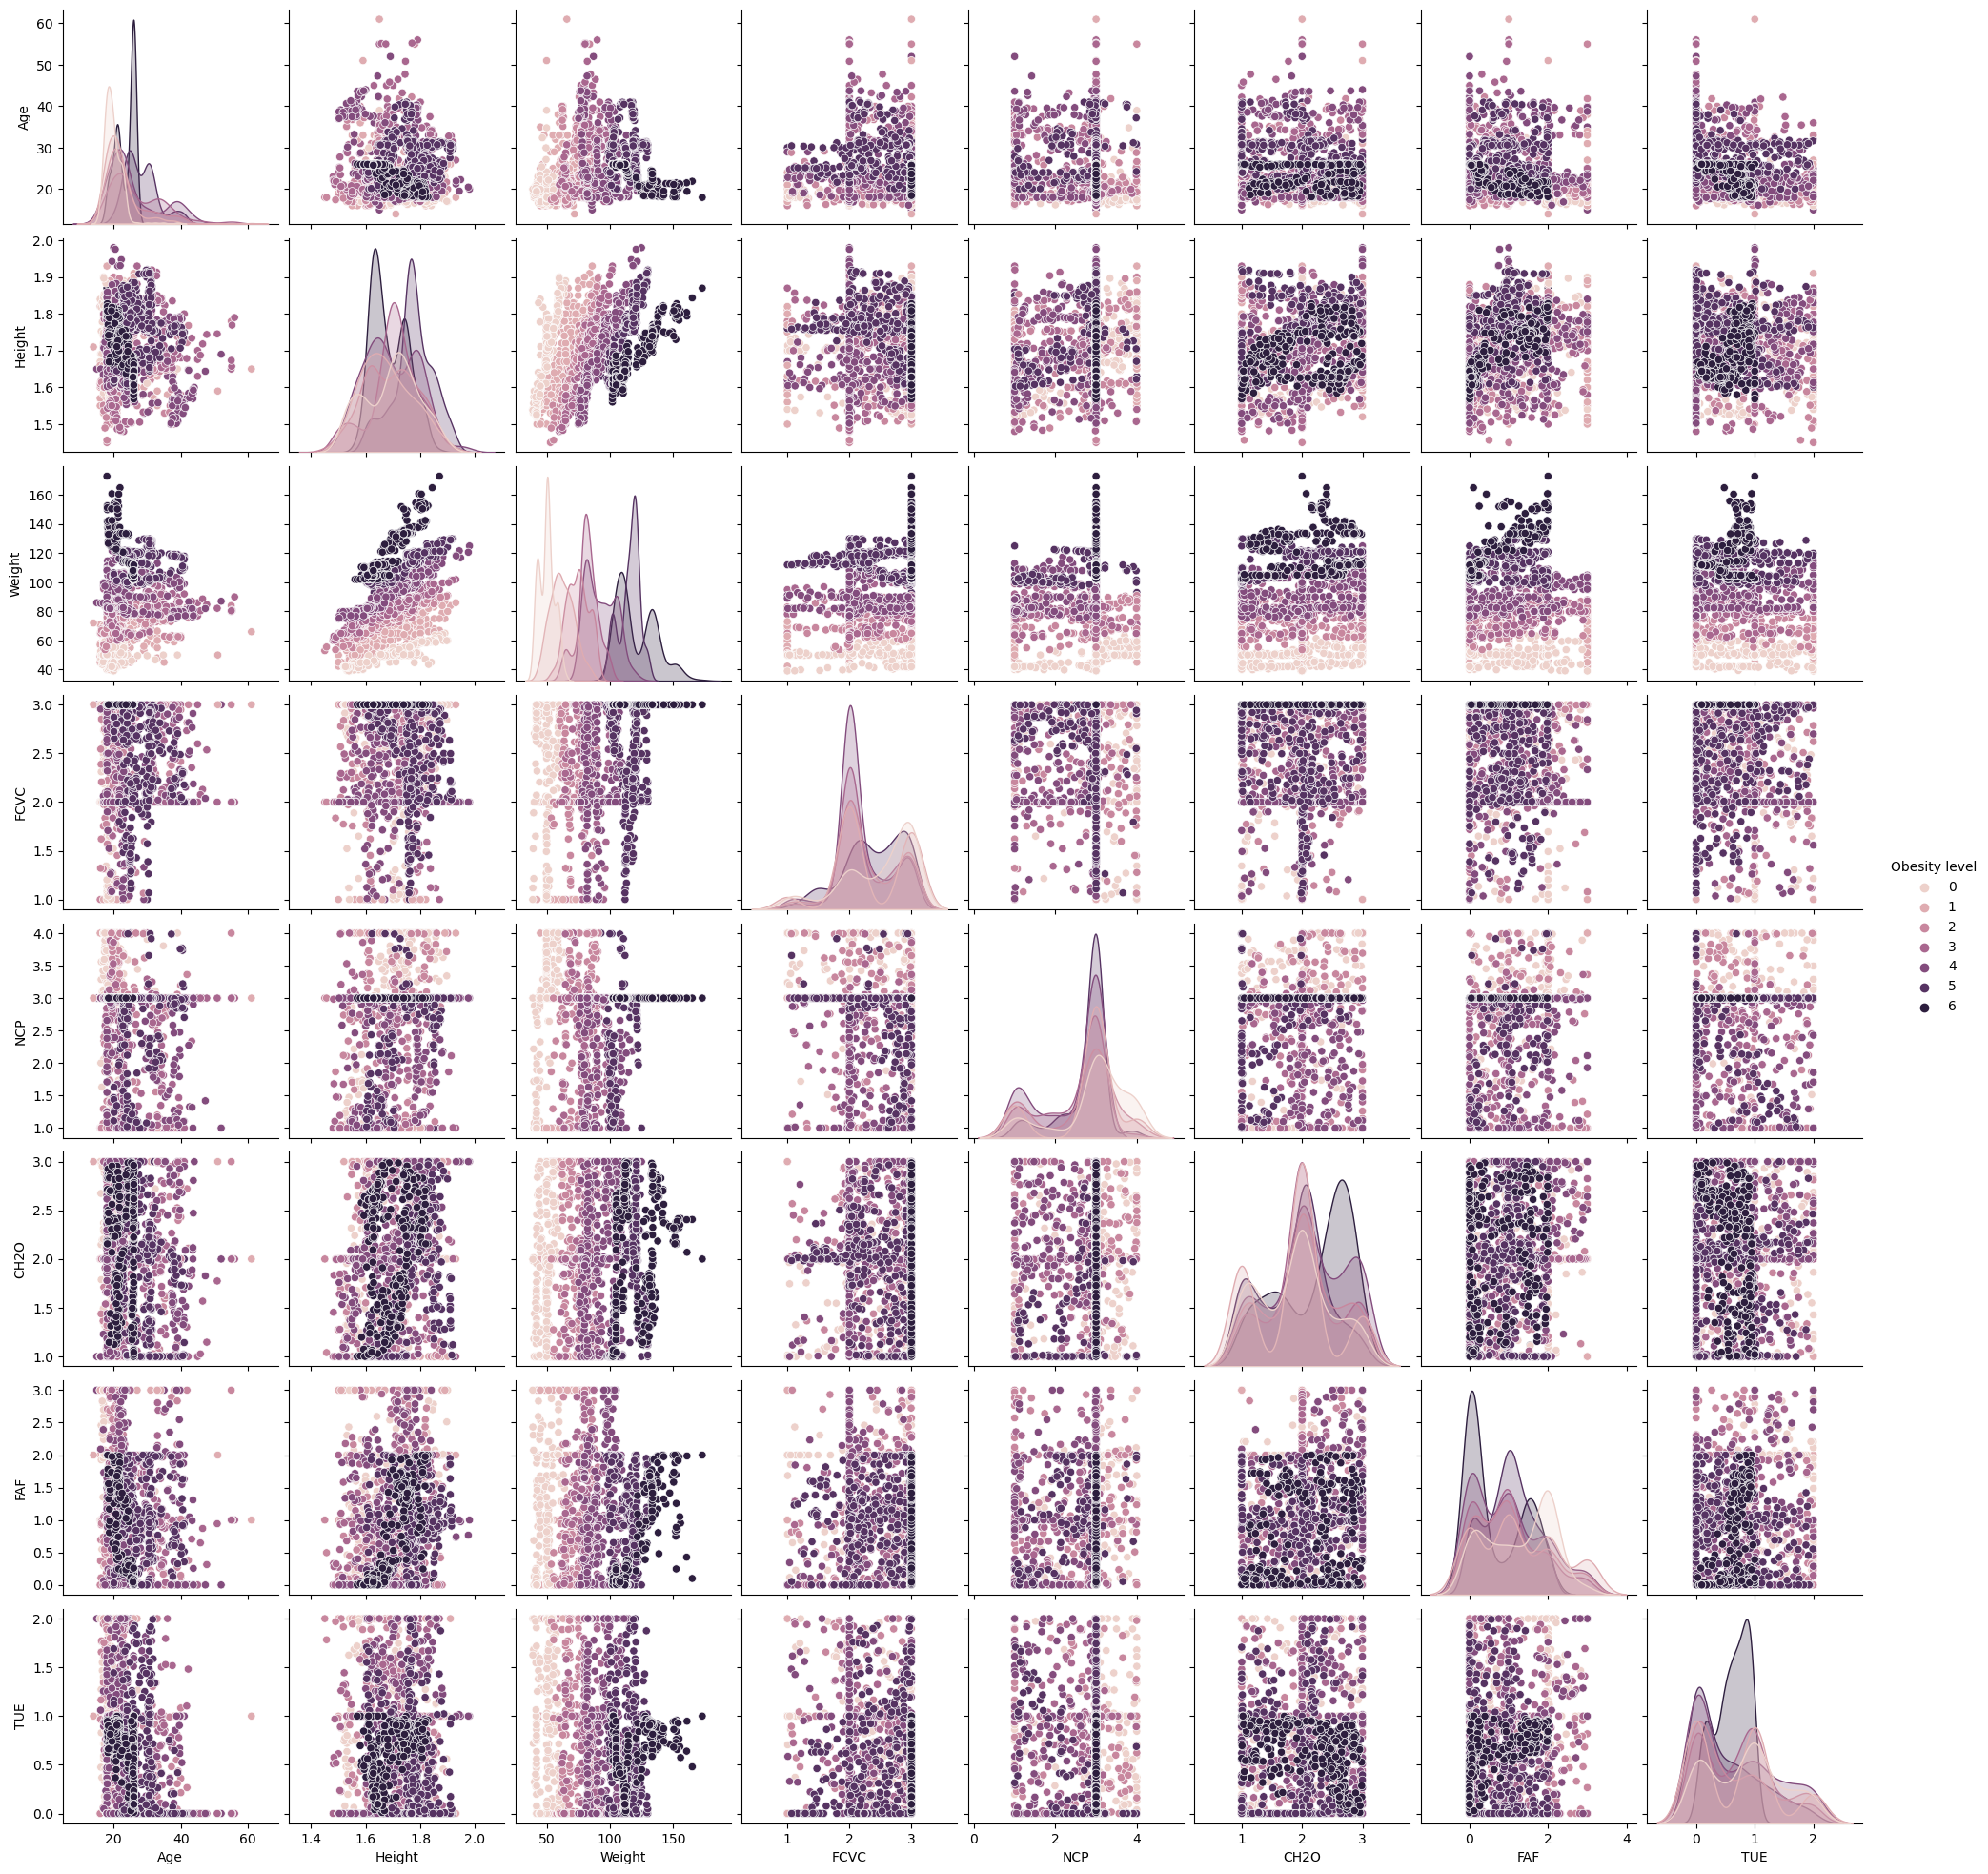

In [14]:
sns.pairplot(data=df,hue='Obesity level')

In [13]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  Obesity level  
0  Public_Transportation        Normal_Weight              1  
1  Public_Transportation        Normal_Weight              1  
2  Public_Transportation        Normal_Weight              1  
3                Walking   Overweight_Level_I              2  
4  Public_Transportation  Overweight_Level_II              3

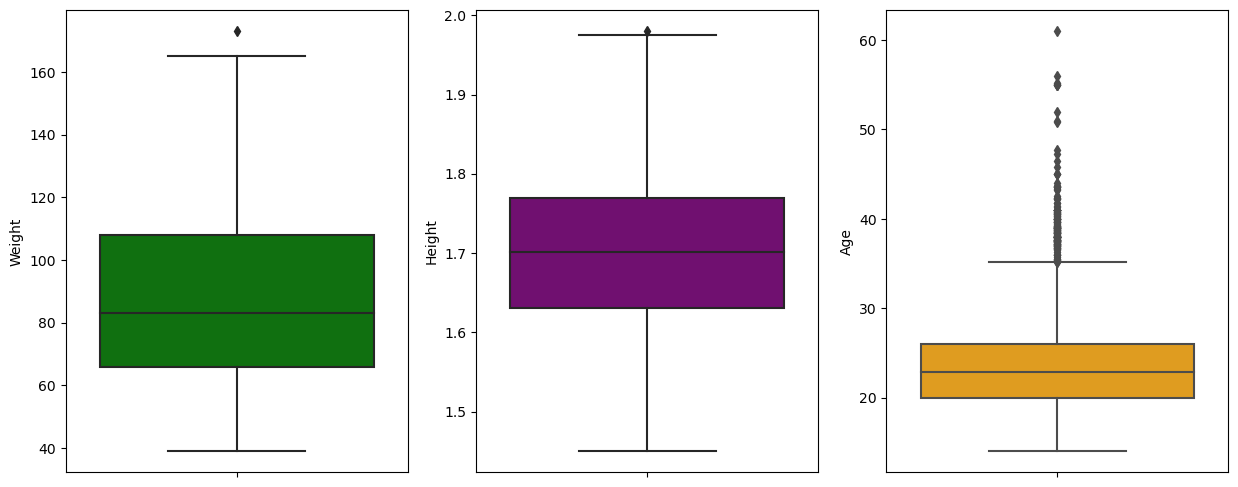

In [14]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Weight'],color='green')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Height'],color='purple')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Age'],color='orange')
plt.show()


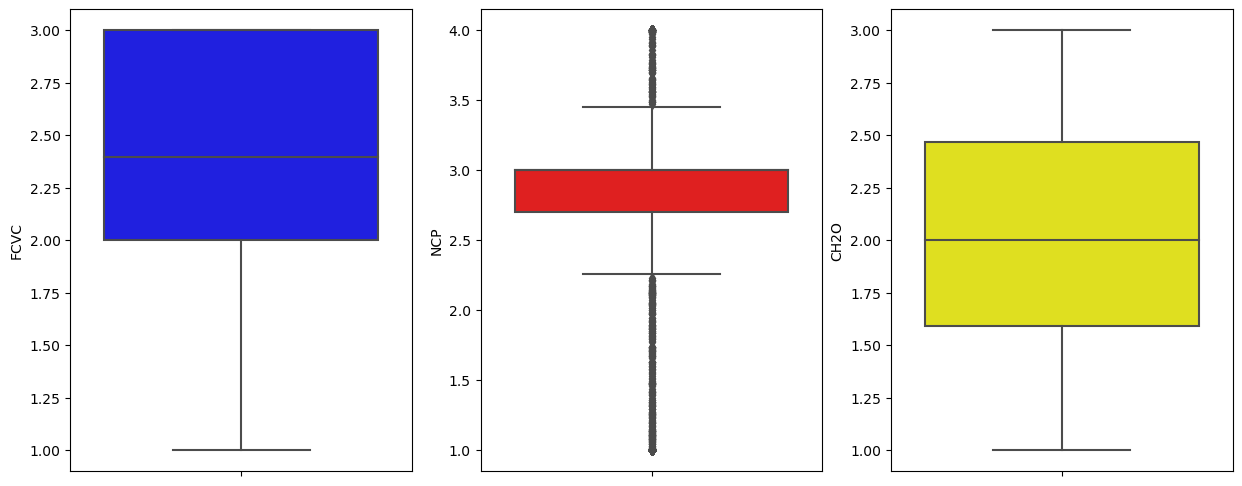

In [15]:

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df['FCVC'],color='BLUE')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['NCP'],color='RED')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['CH2O'],color='YELLOW')
plt.show()

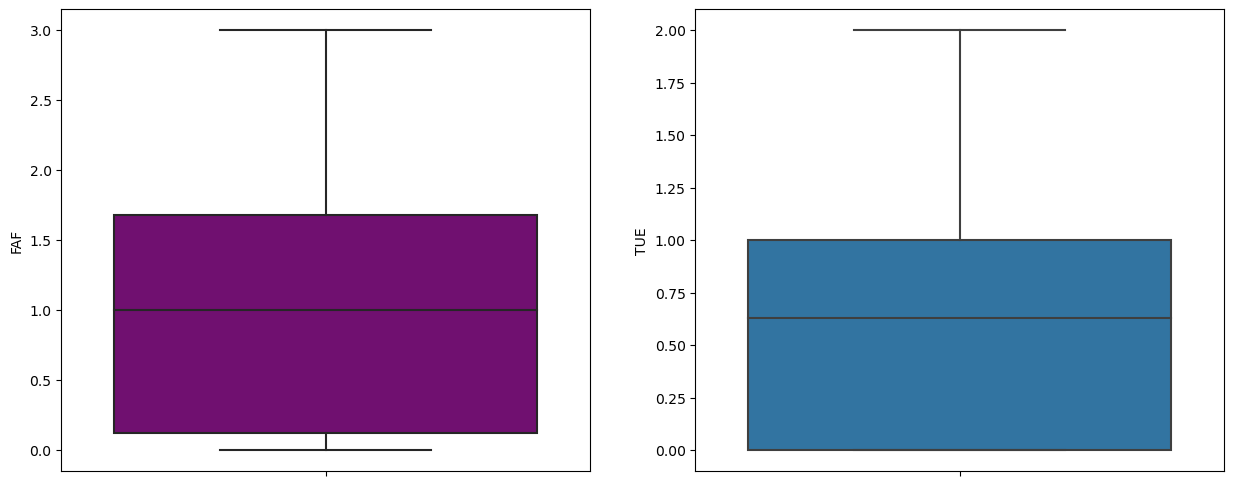

In [16]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['FAF'],color='purple')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['TUE'])

plt.show()

In [17]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

columns_to_clean =['Weight','Height','NCP']

for col in columns_to_clean:
    df = remove_outliers(df, col)

In [18]:
df.info()
df.drop(columns={'NObeyesdad'},axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1508 non-null   object 
 1   Age                             1508 non-null   float64
 2   Height                          1508 non-null   float64
 3   Weight                          1508 non-null   float64
 4   family_history_with_overweight  1508 non-null   object 
 5   FAVC                            1508 non-null   object 
 6   FCVC                            1508 non-null   float64
 7   NCP                             1508 non-null   float64
 8   CAEC                            1508 non-null   object 
 9   SMOKE                           1508 non-null   object 
 10  CH2O                            1508 non-null   float64
 11  SCC                             1508 non-null   object 
 12  FAF                             15

In [19]:
df.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
5    Male  29.0    1.62    53.0                             no  yes   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
5  3.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  Obesity level  
0  Public_Transportation              1  
1  Public_Transportation              1  
2  Public_Transportation              1  
3                Walking              2  
5             Automobile              1

In [20]:
from sklearn.preprocessing import LabelEncoder




label_encoder = LabelEncoder()


for col in df.select_dtypes(include=['object']):
    df[col] = label_encoder.fit_transform(df[col])



In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          1508 non-null   int32  
 1   Age                             1508 non-null   float64
 2   Height                          1508 non-null   float64
 3   Weight                          1508 non-null   float64
 4   family_history_with_overweight  1508 non-null   int32  
 5   FAVC                            1508 non-null   int32  
 6   FCVC                            1508 non-null   float64
 7   NCP                             1508 non-null   float64
 8   CAEC                            1508 non-null   int32  
 9   SMOKE                           1508 non-null   int32  
 10  CH2O                            1508 non-null   float64
 11  SCC                             1508 non-null   int32  
 12  FAF                             15

In [22]:
df.head()

Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2       1  23.0    1.80    77.0                               1     0   2.0   
3       1  27.0    1.80    87.0                               0     0   3.0   
5       1  29.0    1.62    53.0                               0     1   2.0   

   NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  Obesity level  
0  3.0     2      0   2.0    0  0.0  1.0     2       3              1  
1  3.0     2      1   3.0    1  3.0  0.0     1       3              1  
2  3.0     2      0   2.0    0  2.0  1.0     0       3              1  
3  3.0     2      0   2.0    0  2.0  0.0     0       4              2  
5  3.0     2      0   2.0    0  0.0  0.0     1       0              1

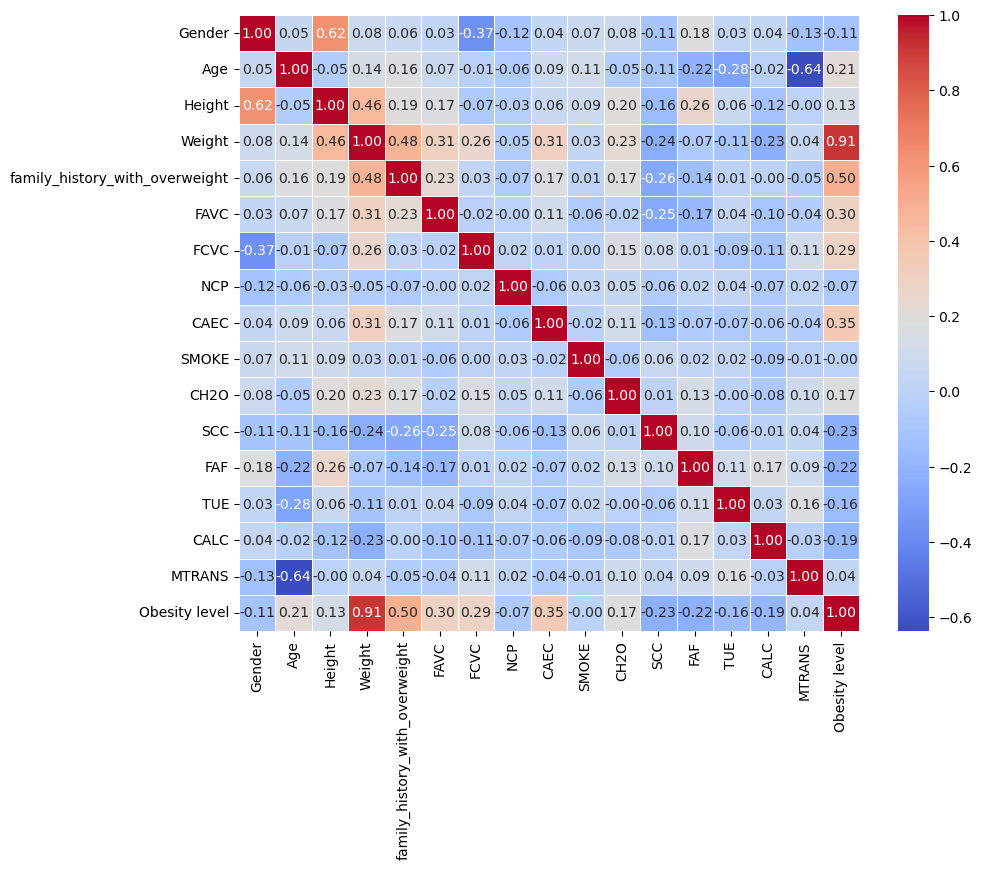

In [23]:
cor = df.corr()


plt.figure(figsize=(10, 8))


sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)

plt.yticks(rotation=0, fontsize=10)
plt.xticks(rotation=90, fontsize=10)

plt.show()

### Splitting the Data into Train/Test

In [24]:
x=df.drop('Obesity level',axis=1)
y=df['Obesity level']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, mean_squared_error,confusion_matrix
from sklearn.svm import SVC
model_scores = {}

### LogisticRegression

In [37]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print("Accuracy for LogisticRegression:", accuracy_dt)

Accuracy for LogisticRegression: 0.9370860927152318


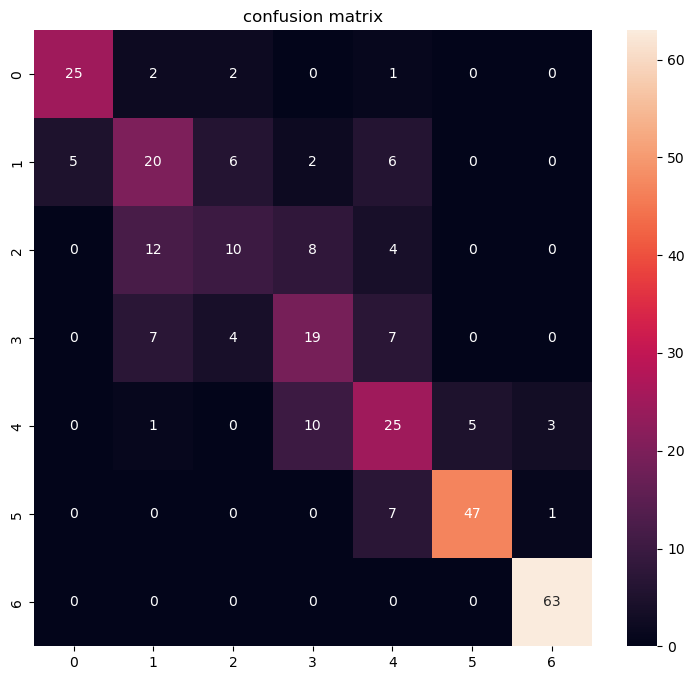

In [38]:
log_cm=confusion_matrix(y_test,y_pred_log)
plt.figure(figsize=(9,8))
plt.title('confusion matrix')
sns.heatmap(log_cm, annot=True,fmt='d')
plt.show()

### Decision Trees

In [27]:
dt_reg = DecisionTreeClassifier(random_state=1111)
dt_reg.fit(x_train, y_train)
y_pred_dt = dt_reg.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy for Decision Tree Regressor:", accuracy_dt)

Accuracy for Decision Tree Regressor: 0.9370860927152318


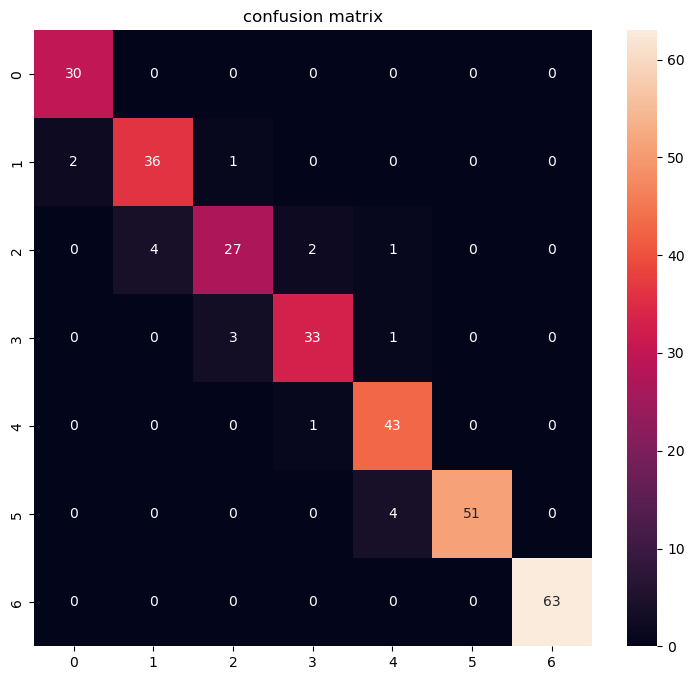

In [28]:
dt_cm=confusion_matrix(y_test,y_pred_dt)
plt.figure(figsize=(9,8))
plt.title('confusion matrix')
sns.heatmap(dt_cm, annot=True,fmt='d')
plt.show()

### Support Vector Machines (SVM)

In [39]:
svm_clf = SVC()
svm_clf.fit(x_train, y_train)
y_pred_svm = svm_clf.predict(x_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy for Support Vector Machines (SVM):", svm_accuracy)

Accuracy for Support Vector Machines (SVM): 0.6026490066225165


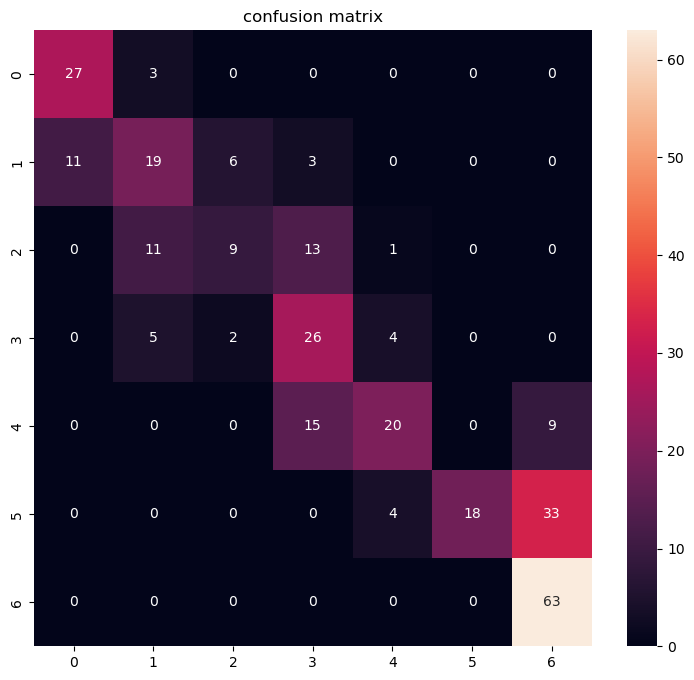

In [40]:
svm_cm=confusion_matrix(y_test,y_pred_svm)
plt.figure(figsize=(9,8))
plt.title('confusion matrix')
sns.heatmap(svm_cm, annot=True,fmt='d')
plt.show()

### Random Forest

In [31]:
rf_clf = RandomForestClassifier(random_state=1111)
rf_clf.fit(x_train, y_train)
y_pred_rf = rf_clf.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy for Random Forest Classifier:", rf_accuracy)

Accuracy for Random Forest Classifier: 0.9536423841059603


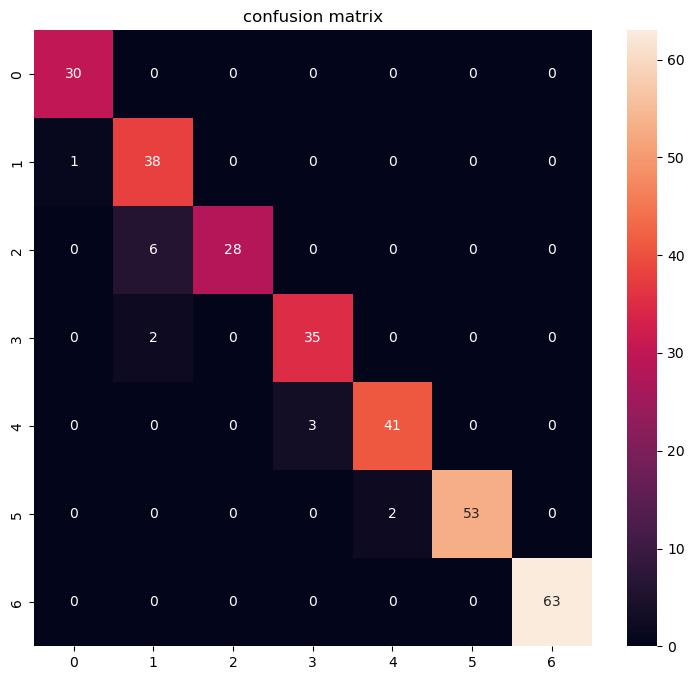

In [32]:
rf_cm=confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(9,8))
plt.title('confusion matrix')
sns.heatmap(rf_cm, annot=True,fmt='d')
plt.show()

In [44]:
accu=pd.DataFrame({'Model':
                     ['Logistic Regression','SVM','Random Forest Classifier','Decision Tree'],
                     'Test Accuracy':
                     [accuracy_log*100,svm_accuracy*100,rf_accuracy*100,accuracy_dt*100]
                     })

In [45]:
accu

Model  Test Accuracy
0       Logistic Regression      69.205298
1                       SVM      60.264901
2  Random Forest Classifier      95.364238
3             Decision Tree      93.708609

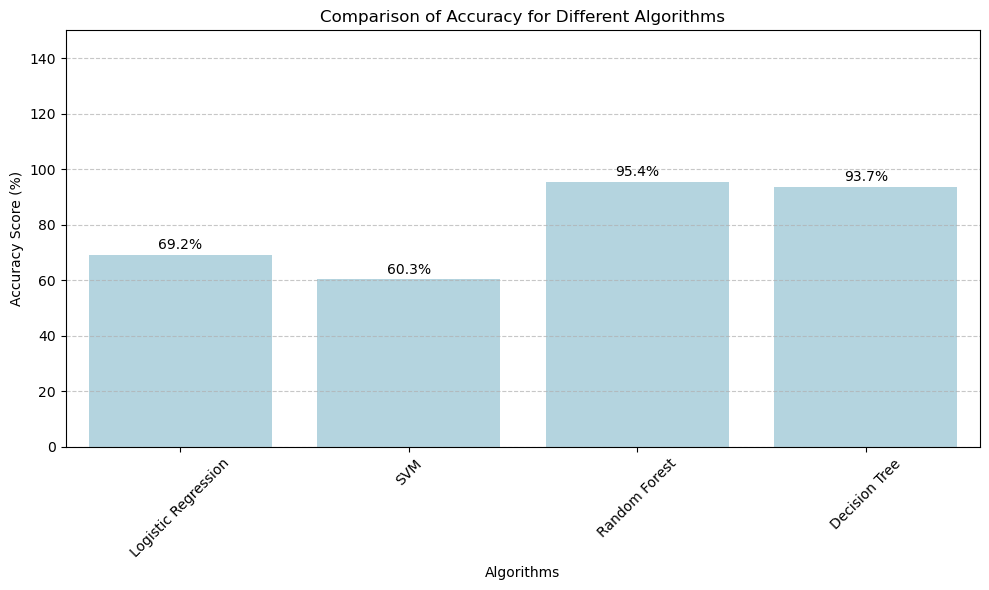

In [52]:

accuracy = [accuracy_log * 100, svm_accuracy * 100, rf_accuracy * 100, accuracy_dt * 100]
algorithms = ['Logistic Regression', 'SVM', 'Random Forest', 'Decision Tree']


plt.figure(figsize=(10, 6))
sns.barplot(x=algorithms, y=accuracy, color='lightblue')  
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score (%)')
plt.title('Comparison of Accuracy for Different Algorithms')
plt.ylim(0, 150)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, v in enumerate(accuracy):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

